In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

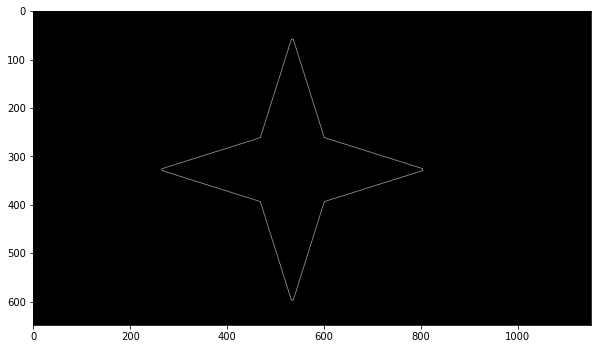

In [2]:
src = cv.imread("./test.png")
gray_img = cv.cvtColor(src,cv.COLOR_BGR2GRAY)
canny_image = cv.Canny(gray_img, 50, 150)
plt.rcParams["figure.figsize"] = [10, 20]
plt.imshow(canny_image,cmap='gray')
plt.show()

## Contour Finding 

[array([[[535,  57]],

       [[534,  58]],

       [[533,  58]],

       ...,

       [[537,  60]],

       [[537,  58]],

       [[536,  58]]], dtype=int32)]


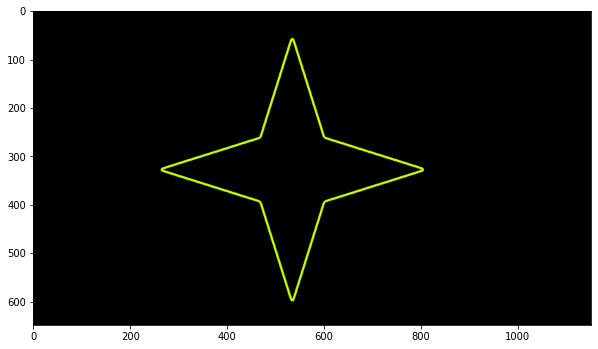

In [3]:
contours, hierarchy = cv.findContours(canny_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
edge_img = canny_image.copy()

print(contours)
draw_contour_img = np.zeros(edge_img.shape,dtype=np.uint8) #สร้างภาพเปล่า ๆ ขึ้นมาเพื่อวาด Contour ที่เราหาได้
draw_contour_img = cv.cvtColor(draw_contour_img,cv.COLOR_GRAY2RGB)
cv.drawContours(draw_contour_img, contours, -1, (200,255,0), 3) # -1 วาด วาดทุกอัน // ถ้าบางอัน ใส่เลขindexของContourที่ต้องการวาด 
                                                                # 3 คือความหนา
plt.imshow(draw_contour_img)
plt.show()

## Polygon Approximation

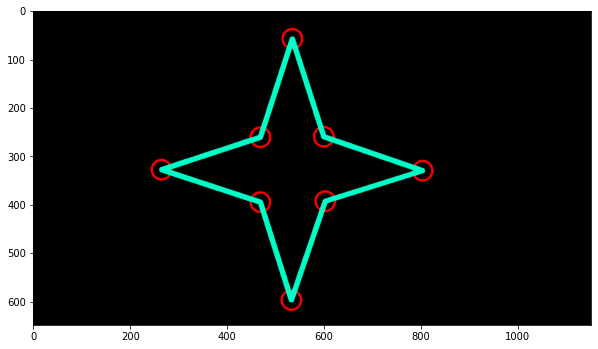

In [4]:
#   เมธอด append() เพื่อเพิ่มข้อมูลใหม่เข้าไปใน List ซึ่งข้อมูลที่เพิ่มเข้าจะอยู่ท้ายสุดและเรียง Index เพิ่มขึ้นไปเรื่อยๆ โดยเริ่มจาก 0
#หากคุณกำลังใช้ while ในการลูปพร้อมหาค่า index ของ list ในภาษา Python อยู่ ให้ลองเปลี่ยนมาใช้คำสั่งนี้
#   enumerate เป็นคำสั่งสำหรับแจกแจงค่า index และข้อมูลใน index ในรูปแบบทูเพิล (Tuple) 
#ดังนี้ (Index,Value) โดยต้องใช้กับข้อมูลชนิด list

contours_approx = []
for i,value in enumerate(contours):
    contours_approx.append( cv.approxPolyDP(contours[i],0.05*cv.arcLength(contours[i],True),True) )
drawn_approx_contour_img = np.zeros(edge_img.shape,dtype=np.uint8) # สร้างภาพเปล่าๆ ขึ้นมาเพื่อวาด Contourที่เราหาได้
drawn_approx_contour_img = cv.cvtColor(drawn_approx_contour_img,cv.COLOR_GRAY2RGB)
''' plot จุดยอด'''
for i,values in enumerate(contours_approx):
    for j,dot in enumerate(values):
        drawn_approx_contour_img = cv.circle(drawn_approx_contour_img, dot[0], 20, (255,0,0), 3)
''' ลากเส้นระหว่างจุด '''
cv.drawContours(drawn_approx_contour_img, contours_approx, -1, (0,255,200), 10) # -1 วาด วาดทุกอัน // ถ้าบางอัน ใส่เลขindexของContourที่ต้องการวาด
plt.imshow(drawn_approx_contour_img)
plt.show()

## Moment/Centroid

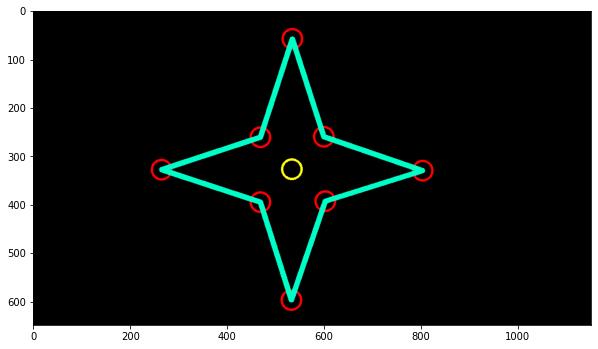

In [5]:
#contours จำนวนของวัตถุในรูป
M = cv.moments(contours[0]) # get moment
cx = int(M['m10']/M['m00']) # get centroid x
cy = int(M['m01']/M['m00']) # get centroid y
drawn_approx_contour_img = cv.circle(drawn_approx_contour_img, (cx,cy), 20, (255,255,20), 3) #สีเหลือง
plt.imshow(drawn_approx_contour_img)
plt.show()

## Rectangle Boundary

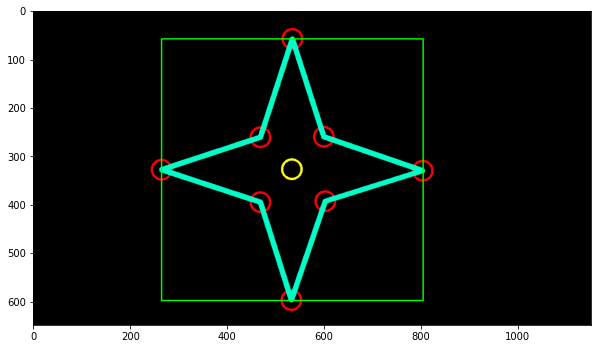

In [6]:
x,y,w,h = cv.boundingRect(contours[0])
cv.rectangle(drawn_approx_contour_img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(drawn_approx_contour_img)
plt.show()

## Center

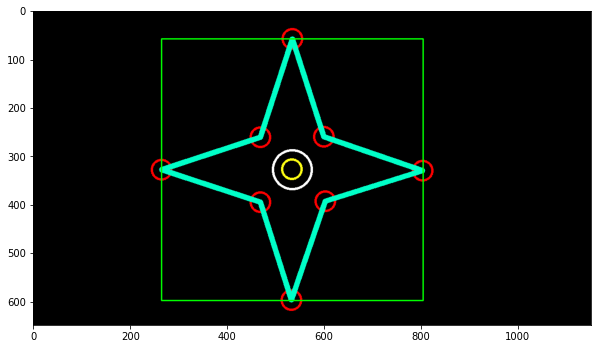

In [7]:
center = [x+(w//2), y+(h//2)]
drawn_approx_contour_img = cv.circle(drawn_approx_contour_img, center, 40, (255,255,255), 3) # สีชมพู
plt.imshow(drawn_approx_contour_img)
plt.show()

## Rotated Rect

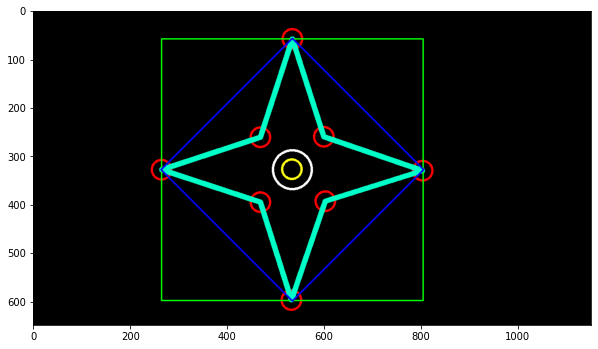

In [8]:
rect = cv.minAreaRect(contours[0])
box = cv.boxPoints(rect)
box = np.int0(box)
cv.drawContours(drawn_approx_contour_img,[box],0,(0,0,255),2) # สีน้ำเงิน
plt.imshow(drawn_approx_contour_img)
plt.show()

## min Circle

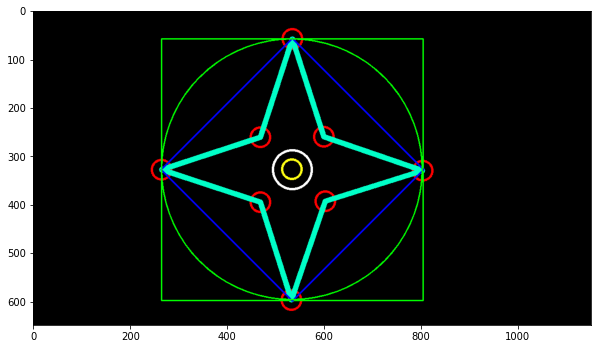

In [9]:
(x,y),radius = cv.minEnclosingCircle(contours[0])
center = (int(x),int(y))
radius = int(radius)
cv.circle(drawn_approx_contour_img,center,radius,(0,255,0),2) # สีเขียว
plt.imshow(drawn_approx_contour_img)
plt.show()

## min Ellipse

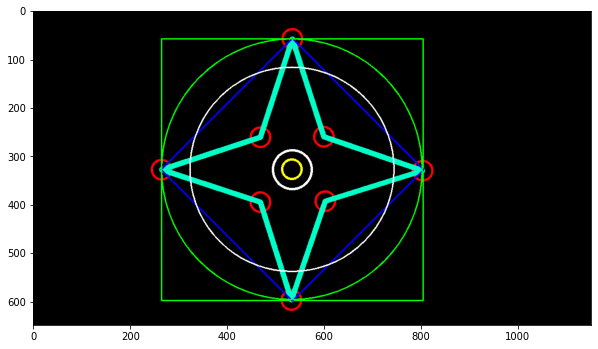

In [10]:
ellipse = cv.fitEllipse(contours[0])
cv.ellipse(drawn_approx_contour_img,ellipse,(255,255,255),2) 
plt.imshow(drawn_approx_contour_img)
plt.show()

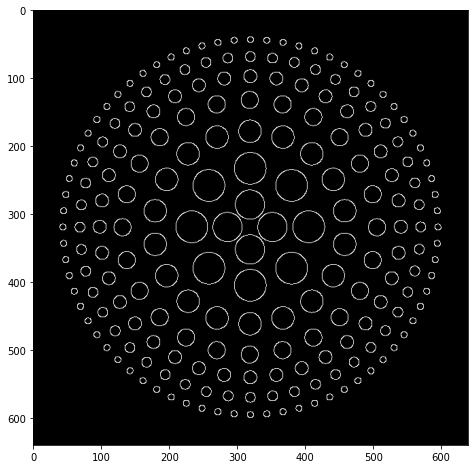

In [11]:
src = cv.imread("./Circle.jpg")
gray_img = cv.cvtColor(src,cv.COLOR_BGR2GRAY)
canny_image = cv.Canny(gray_img, 50, 150)
plt.rcParams["figure.figsize"] = [8, 8]
plt.imshow(canny_image,cmap='gray')
plt.show()

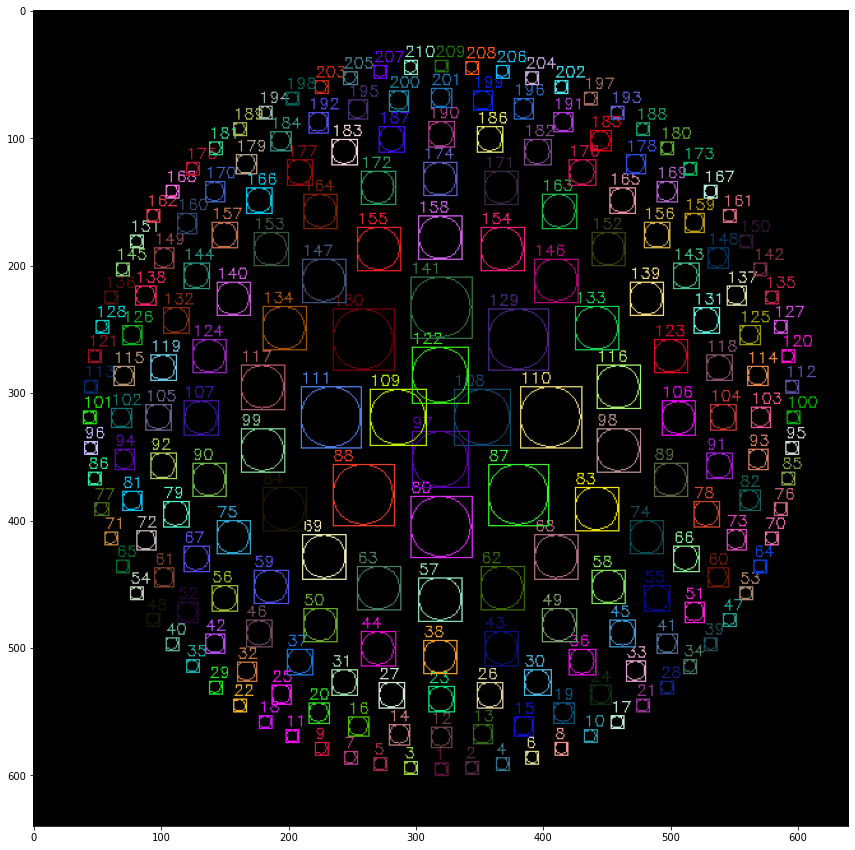

All Circle => 210


In [18]:
     
from numpy import random
contours, hierarchy = cv.findContours(canny_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
edge_img = canny_image.copy()
drawn_contour_img = np.zeros(edge_img.shape,dtype=np.uint8) # สร้างภาพเปล่าๆ ขึ้นมาเพื่อวาด Contourที่เราหาได้
drawn_contour_img = cv.cvtColor(drawn_contour_img,cv.COLOR_GRAY2RGB)
for i,value in enumerate(contours):
    c = random.randint(255, size=(3))
    color = (c[0].item(),c[1].item(),c[2].item())
    cv.drawContours(drawn_contour_img, contours, i, color, 1)
    x,y,w,h = cv.boundingRect(contours[i])
    cv.putText(drawn_contour_img,str(i+1),(x,y-3),cv.FONT_HERSHEY_SIMPLEX,0.4,color,1)
    cv.rectangle(drawn_contour_img,(x,y),(x+w,y+h),color,1)
plt.rcParams["figure.figsize"] = [15, 15] 
plt.imshow(drawn_contour_img)
plt.show()
print(f"All Circle => {i+1}")